In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h1>Load the data</h1>

In [6]:
data = pd.read_csv('bank-additional-full.csv', sep=';')

<h1>Display the first few rows</h1>

In [9]:
print(data.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

<h1> Get basic information about the dataset</h1>

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

<h1>Display summary statistics</h1>

In [15]:
print(data.describe())

               age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198    

<h1>Check for missing values</h1>

In [18]:
print(data.isnull().sum())

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


<h1>Check for duplicated rows and remove them</h1>

In [22]:

# Check for duplicates
duplicates = data.duplicated().sum()
print(f'Number of duplicate rows: {duplicates}')

# Remove duplicates if any
data.drop_duplicates(inplace=True)
print(f'Number of rows after removing duplicates: {len(data)}')


Number of duplicate rows: 12
Number of rows after removing duplicates: 41176


In [24]:
# Identify categorical features
categorical_features = data.select_dtypes(include=['object']).columns
print(f'Categorical Features: {categorical_features}')


Categorical Features: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')


In [26]:
# Encode categorical variables using One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Display the first few rows of the transformed dataset
print(data_encoded.head())


   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_nov  month_oct  \
0          -36.4      4.857       5191.0  ...      False      False   
1          -36.4      4.857       5191.0  ...      False      False   
2          -36.4      4.857       5191.0  ...      False      False   
3          -36.4      4.857       5191.0  ...      False      False   
4          -36.4      4.857       5191.0  ...      False      False   

   month_sep  day_of_week_mon  day_of_week_thu  day_of_week_tue  \
0      False             True            Fa

In [28]:
# Display summary statistics
print(data_encoded.describe())


               age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
std        1.570883        0.578839       4.627860    

In [30]:
# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Display correlation with the target variable
print(correlation_matrix['y_yes'].sort_values(ascending=False))


y_yes                            1.000000
duration                         0.405297
poutcome_success                 0.316302
previous                         0.230202
month_mar                        0.144027
month_oct                        0.137538
month_sep                        0.126079
job_student                      0.093962
job_retired                      0.092364
month_dec                        0.079311
cons.conf.idx                    0.054802
marital_single                   0.054209
education_university.degree      0.050267
age                              0.030381
education_unknown                0.021476
job_unemployed                   0.014749
day_of_week_thu                  0.013797
housing_yes                      0.011804
day_of_week_tue                  0.008123
education_illiterate             0.007246
day_of_week_wed                  0.006290
marital_unknown                  0.005210
education_professional.course    0.001071
job_unknown                     -0

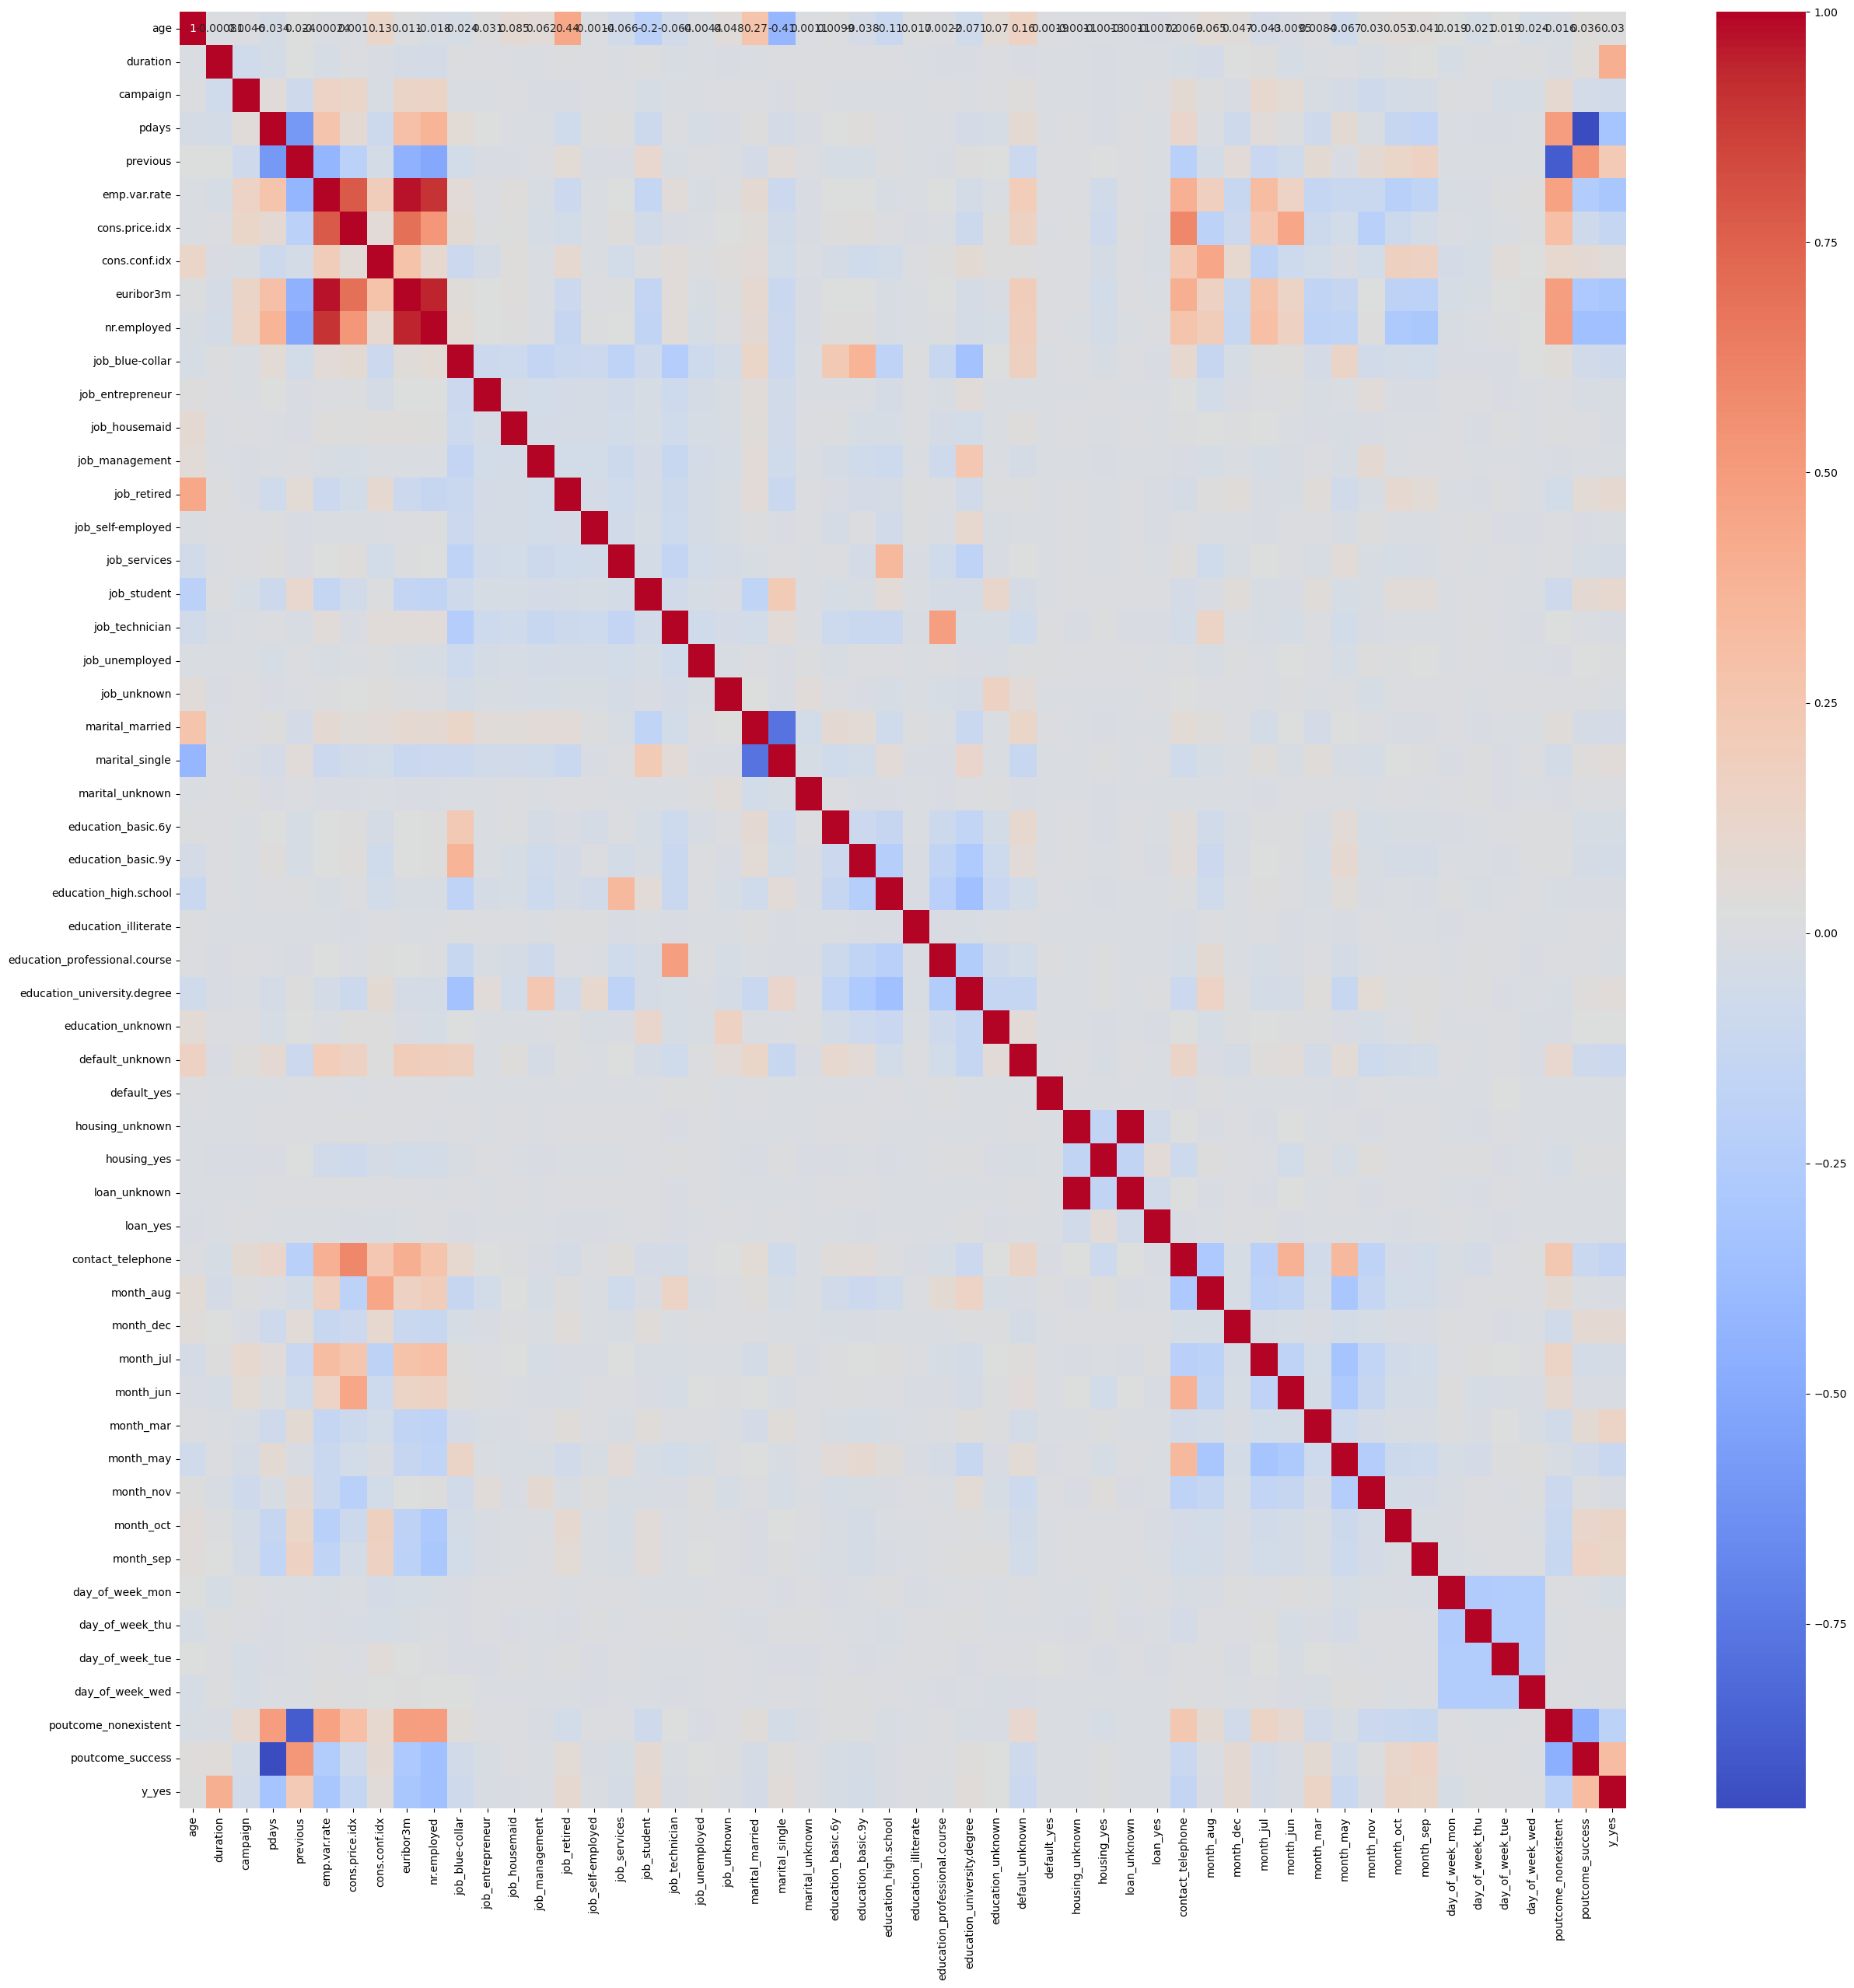

In [31]:
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


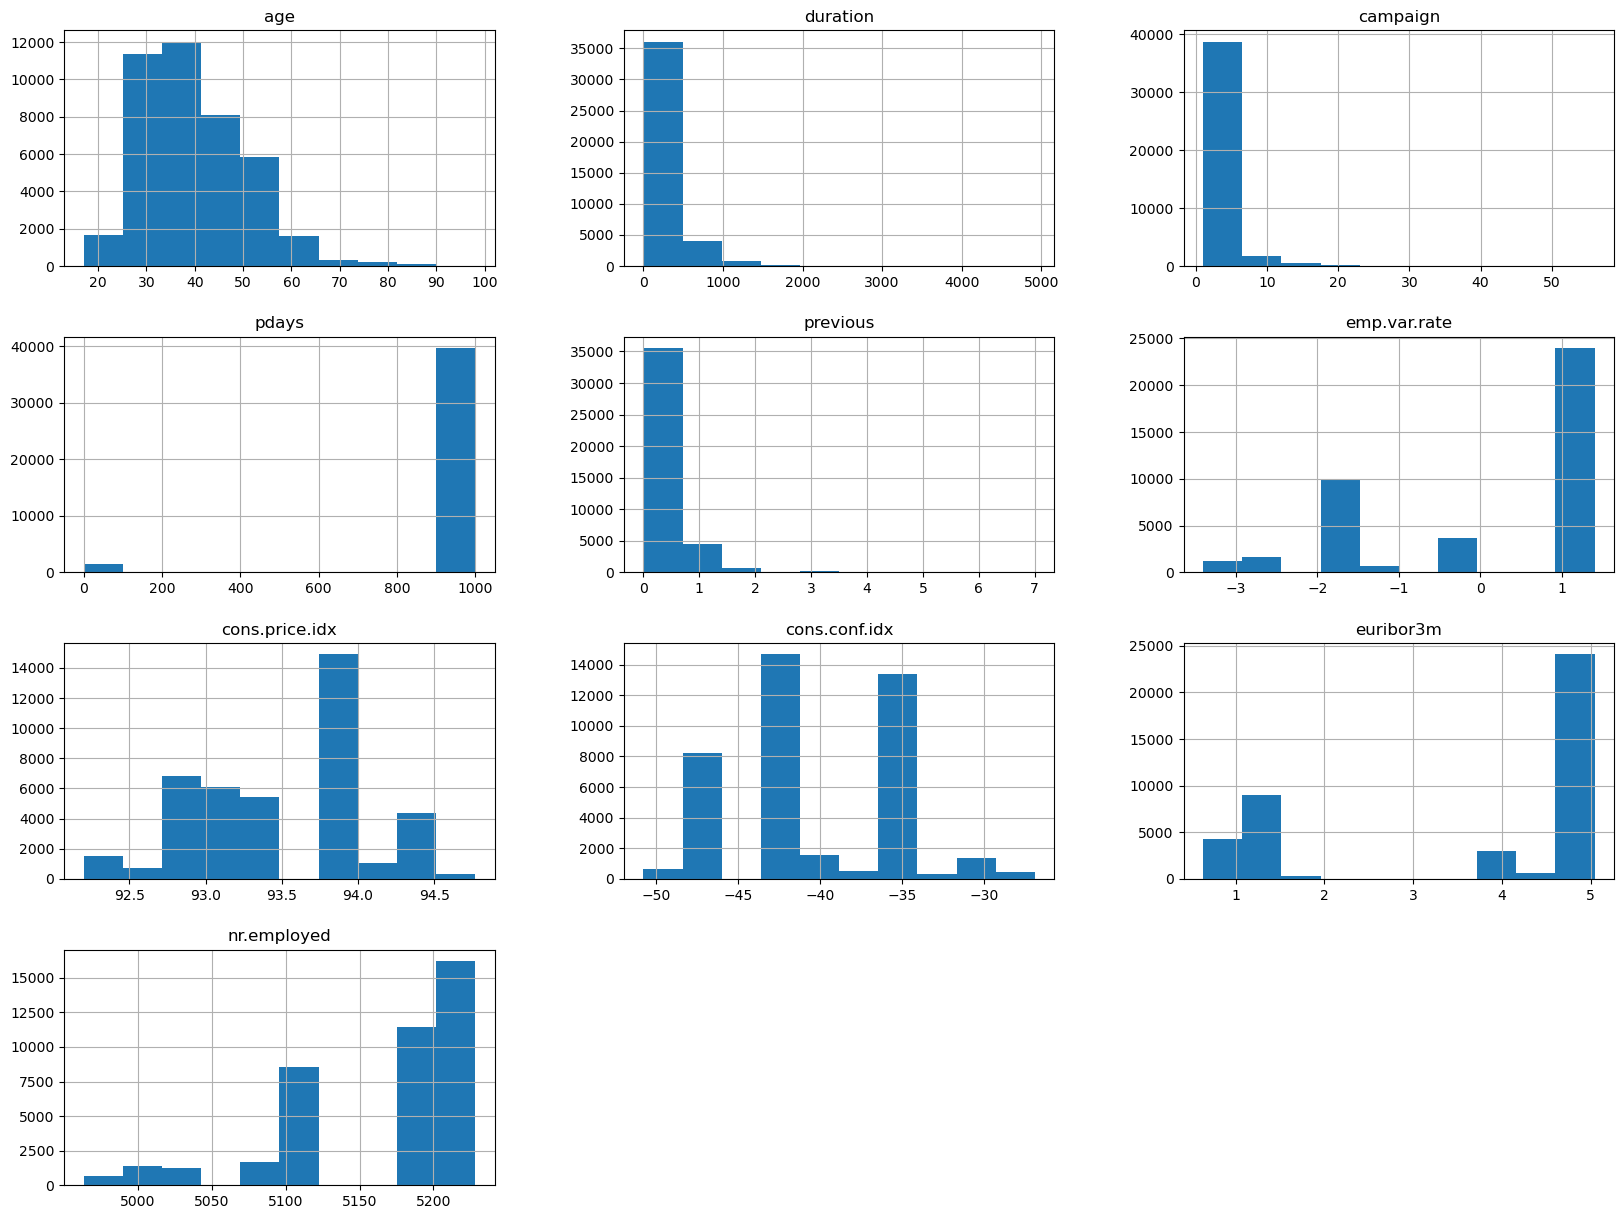

In [33]:
data_encoded.hist(figsize=(20, 15))
plt.show()


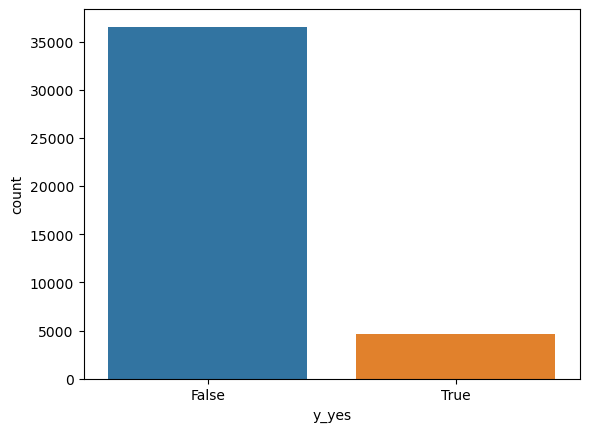

In [34]:
sns.countplot(x='y_yes', data=data_encoded)
plt.show()


y_yes
False    36537
True      4639
Name: count, dtype: int64


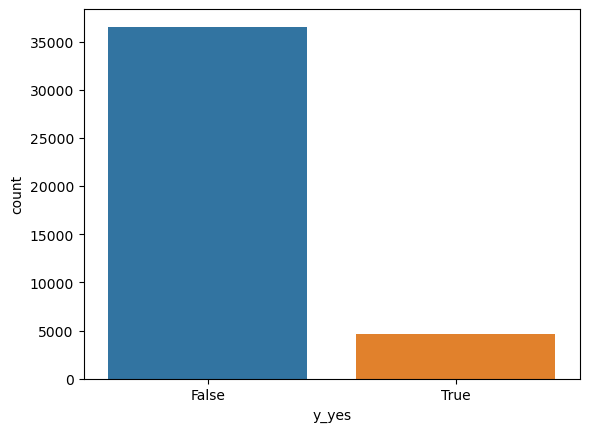

In [36]:
print(data_encoded['y_yes'].value_counts())
sns.countplot(x='y_yes', data=data_encoded)
plt.show()


In [37]:
from sklearn.model_selection import train_test_split

# Define the feature variables (X) and the target variable (y)
X = data_encoded.drop(columns=['y_yes'])
y = data_encoded['y_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shape of the datasets
print(f"Training set: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set: X_test: {X_test.shape}, y_test: {y_test.shape}")


Training set: X_train: (28823, 53), y_train: (28823,)
Testing set: X_test: (12353, 53), y_test: (12353,)


In [38]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled\n",X_train_scaled)
print("X_test_scaled\n",X_test_scaled)


X_train_scaled
 [[ 1.82013614e+00 -2.21099319e-01  5.19183440e-01 ... -4.98015112e-01
   3.94932609e-01 -1.84415207e-01]
 [-8.66934121e-01  6.55526628e+00 -5.72499386e-01 ... -4.98015112e-01
   3.94932609e-01 -1.84415207e-01]
 [-7.70967326e-01 -8.38184404e-01 -5.72499386e-01 ... -4.98015112e-01
   3.94932609e-01 -1.84415207e-01]
 ...
 [ 2.97173768e+00 -2.82602297e-02 -2.08605111e-01 ... -4.98015112e-01
  -2.53207757e+00 -1.84415207e-01]
 [-3.23296527e-03  1.45294951e-01 -2.08605111e-01 ...  2.00797120e+00
   3.94932609e-01 -1.84415207e-01]
 [-2.01853566e+00 -6.56915661e-01  5.19183440e-01 ... -4.98015112e-01
   3.94932609e-01 -1.84415207e-01]]
X_test_scaled
 [[ 1.82013614  4.63844573 -0.57249939 ... -0.49801511  0.39493261
  -0.18441521]
 [-0.57903374 -0.03597379 -0.57249939 ... -0.49801511 -2.53207757
  -0.18441521]
 [-0.77096733  0.06815931 -0.20860511 ...  2.0079712   0.39493261
  -0.18441521]
 ...
 [-0.77096733 -0.07839839 -0.20860511 ... -0.49801511  0.39493261
  -0.18441521]
 [-0

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of models to try
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Dictionary to store performance metrics
performance_metrics = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=True)
    recall = recall_score(y_test, y_pred, pos_label=True)
    f1 = f1_score(y_test, y_pred, pos_label=True)
    
    # Store the performance metrics
    performance_metrics[model_name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

# Print performance metrics
for model_name, metrics in performance_metrics.items():
    print(f"Model: {model_name}")
    for metric_name, metric_value in metrics.items():
        print(f"{metric_name}: {metric_value:.4f}")
    print("\n")


Model: Logistic Regression
Accuracy: 0.9080
Precision: 0.6625
Recall: 0.4108
F1 Score: 0.5072


Model: Decision Tree
Accuracy: 0.8883
Precision: 0.5157
Recall: 0.5084
F1 Score: 0.5120


Model: Random Forest
Accuracy: 0.9118
Precision: 0.6750
Recall: 0.4537
F1 Score: 0.5426


Model: Support Vector Machine
Accuracy: 0.9045
Precision: 0.6529
Recall: 0.3659
F1 Score: 0.4689


Model: K-Nearest Neighbors
Accuracy: 0.8929
Precision: 0.5637
Recall: 0.3139
F1 Score: 0.4032


Model: Gradient Boosting
Accuracy: 0.9154
Precision: 0.6718
Recall: 0.5204
F1 Score: 0.5865




In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier


In [48]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.1],
    'max_depth': [3, 4],
    'min_samples_split': [2],
    'min_samples_leaf': [1],
    'subsample': [1.0]
}


In [49]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Initialize GridSearchCV with the model and the parameter grid
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                           scoring='accuracy', cv=2, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 4 candidates, totalling 8 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [3, 4],
                         'min_samples_leaf': [1], 'min_samples_split': [2],
                         'n_estimators': [100, 200], 'subsample': [1.0]},
             scoring='accuracy', verbose=2)

In [58]:
# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_
best_model

GradientBoostingClassifier(max_depth=4)

In [60]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_pred

array([ True, False,  True, ..., False, False, False])

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=True)
recall = recall_score(y_test, y_pred, pos_label=True)
f1 = f1_score(y_test, y_pred, pos_label=True)

# Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Accuracy: 0.9157
Precision: 0.6711
Recall: 0.5274
F1 Score: 0.5906


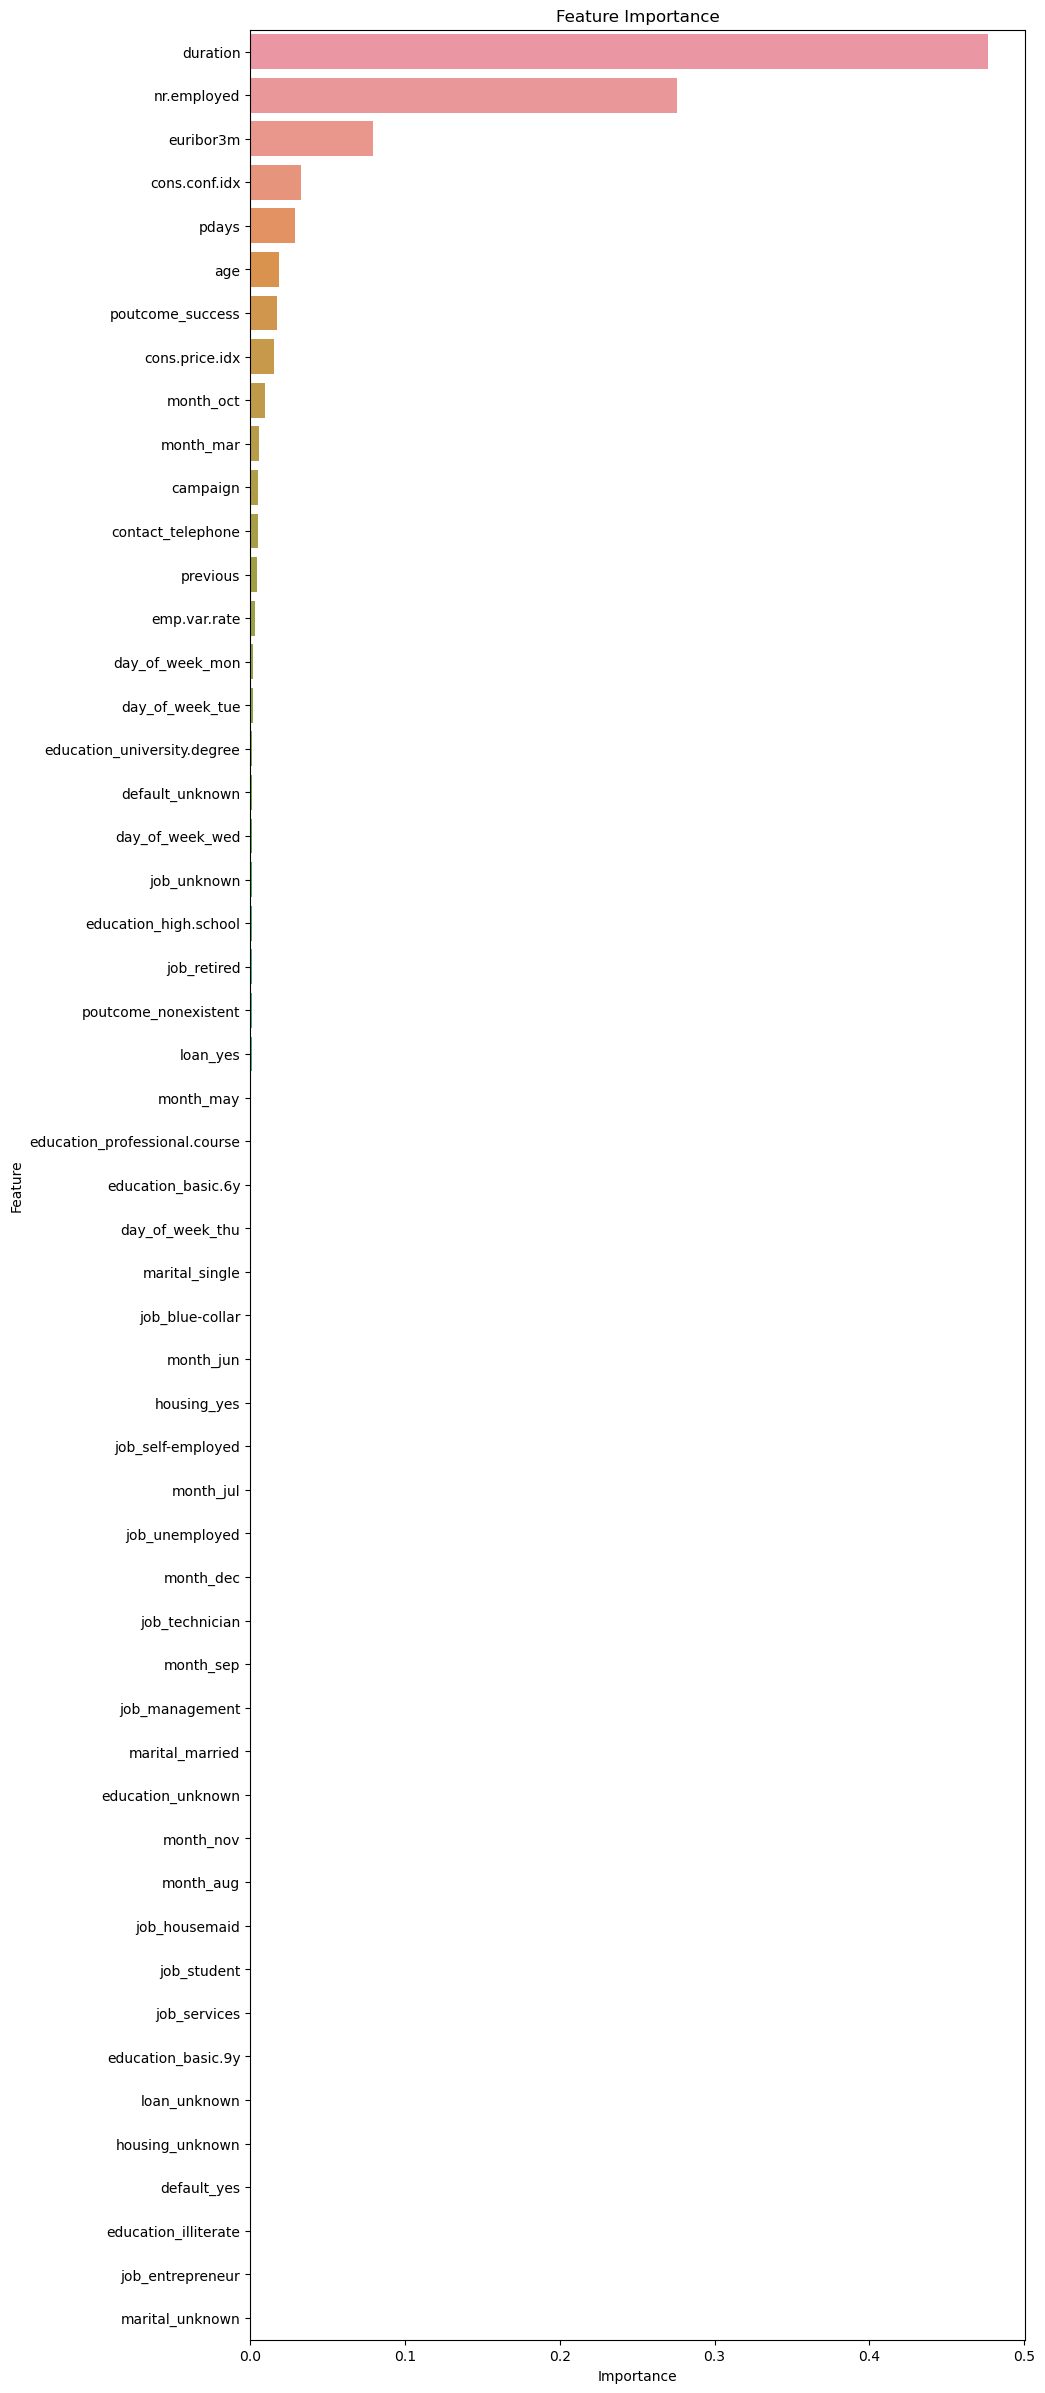

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from the best model
feature_importance = best_model.feature_importances_

# Create a DataFrame for visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 30))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()


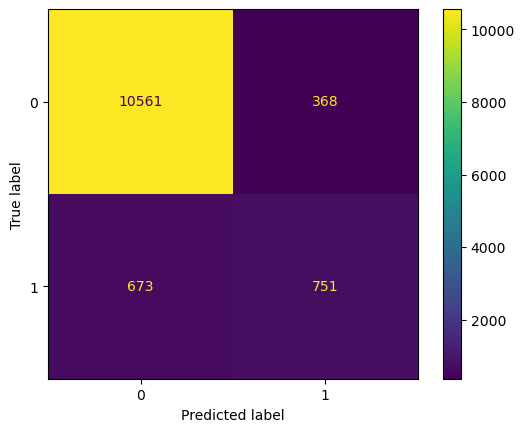

In [74]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


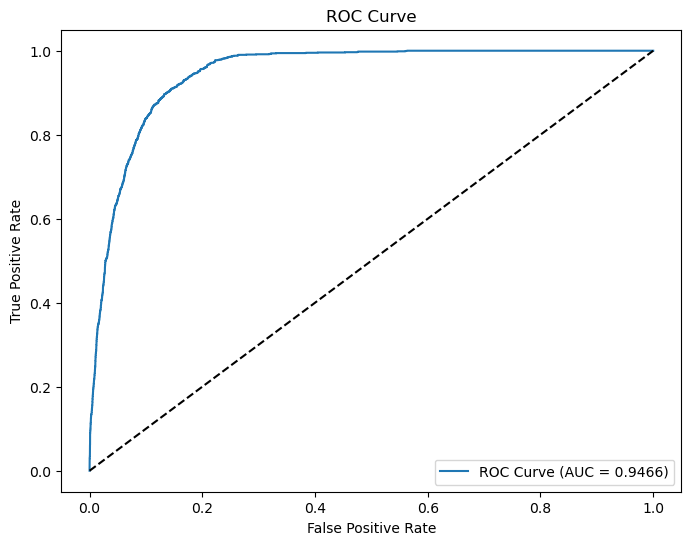

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the probability predictions
y_prob = best_model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
